<a href="https://colab.research.google.com/github/scarlxrd54288/Telegram/blob/master/Regresi%C3%B3n_Lineal_Laboratorio_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESIÓN LINEAL SIMPLE

**Universitarios:** Pinto Barrón Osvaldo y Rodriguez Medina Leyla.
**Carrera:** Ingeniería en Diseño y Animación Digital.

**Temática del dataset:** Notas finales de un estudiante en base a las horas de estudio.

**Enlace del dataset:** [Student_Marks](https://www.kaggle.com/datasets/yasserh/student-marks-dataset/data)

In [ ]:
# Utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Análisis y manipulación de datos
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión con una varibale

El archivo `/content/Student_Marks.csv` contiene el dataset para el problema de regresion lineal. Contiene 3 columnas, de las cuales usaremos la segunda y la tercera. La segunda columna muestra las horas de estudio y la tercera contiene las notas finales de un estudiante.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Leer datos separados por una coma con la librería de "Pandas"
data = pd.read_csv('/content/Student_Marks.csv', delimiter=',')

# Tomamos en cuenta para el dato de entrada (X) la segunda columna
X = data.iloc[:, 1].values

# Para la etiqueta (Y) la tercera columna
y = data.iloc[:, 2].values

# m = numero de ejemplos de entrenamiento
m = y.size

In [ ]:
print(X)

[4.508 0.096 3.133 7.909 7.811 3.211 6.063 3.413 4.41  6.173 7.353 0.423
 4.218 4.274 2.908 4.26  5.719 6.08  7.711 3.977 4.733 6.126 2.051 4.875
 3.635 1.407 0.508 4.378 0.156 1.299 3.864 1.923 0.932 6.594 4.083 7.543
 2.966 7.283 6.533 7.775 0.14  2.754 3.591 1.557 1.954 2.061 3.797 4.779
 5.635 3.913 6.703 4.13  0.771 6.049 7.591 2.913 7.641 7.649 6.198 7.468
 0.376 2.438 3.606 4.869 0.13  2.142 5.473 0.55  1.395 3.948 3.736 2.518
 4.633 1.629 6.954 0.803 6.379 5.985 7.451 0.805 7.957 2.262 7.41  3.197
 1.982 6.201 4.067 1.033 1.803 6.376 4.182 2.73  5.027 6.471 3.919 3.561
 0.301 7.163 0.309 6.335]


In [ ]:
print(y)

[19.202  7.734 13.811 53.018 55.299 17.822 29.889 17.264 20.348 30.862
 42.036 12.132 24.318 17.672 11.397 19.466 30.548 38.49  50.986 25.133
 22.073 35.939 12.209 28.043 16.517  6.623 12.647 26.532  9.333  8.837
 24.172  8.1   15.038 39.965 17.171 43.978 13.119 46.453 41.358 51.142
  7.336 15.725 19.771 10.429  9.742  8.924 16.703 22.701 26.882 19.106
 40.602 22.184  7.892 36.653 53.158 18.238 53.359 51.583 31.236 51.343
 10.522 10.844 19.59  21.379 12.591 13.562 27.569  6.185  8.92  21.4
 16.606 13.416 20.398  7.014 39.952  6.217 36.746 38.278 49.544  6.349
 54.321 17.705 44.099 16.106 16.461 39.957 23.149  6.053 11.253 40.024
 24.394 19.564 23.916 42.426 24.451 19.128  5.609 41.444 12.027 32.357]


In [ ]:
print(X.size)

100


### 1.1 Trazar los datos

In [ ]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Nota Final')
    pyplot.xlabel('Horas de estudio')

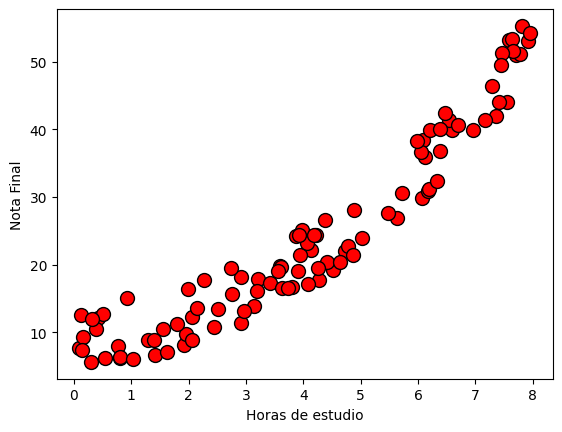

In [ ]:
plotData(X, y)

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [ ]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [ ]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    # numero de ejemplos de entrenamiento
    m = y.size

    J = 0
    h = np.dot(X, theta) # Multiplica
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) # Square (Cuadrado)
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [ ]:
# Definimos valores de Theta 1 y 2
theta_1 = np.array([0.0, 0.0])
theta_2 = np.array([-1, 2])

# Cálculo del costo
J1 = computeCost(X, y, theta_1)
J2 = computeCost(X, y, theta_2)

# Imprimimos los resultados
print('Costo calculado con theta_1 = %.2f \nCosto calculado con theta_2 = %.2f' % (J1, J2))

Costo calculado con theta_1 = 399.71 
Costo calculado con theta_2 = 198.33


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # Numero de ejemplos de entrenamiento

    # Hace una copia de theta, para evitar cambiar la matriz original,
    # Ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)

        # Guarda el costo J en cada iteración
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [ ]:
# Inicializa los parametros de ajuste
theta = np.zeros(2)

# Configuraciones para el descenso por el gradiente
iterations = 50
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print(f"Costo final luego de {iterations} iteraciones: {J_history[-1]:.2f}")

Theta encontrada por descenso gradiente: 1.0805, 5.7154
Costo final luego de 50 iteraciones: 11.40


Se utilizan los parametros finales para grafical la linea.

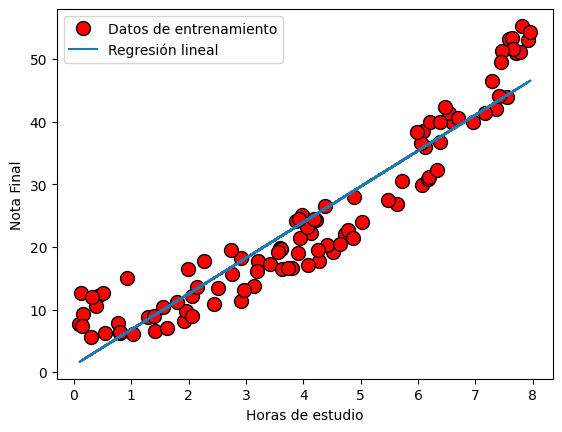

In [ ]:
# Gráfica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [ ]:
# Predecir valores de notas para valores entre 0,1 y 7.96 horas de estudio
hora_estudio_1 = 0.1
hora_estudio_2 = 7.96

predict_1 = np.dot([1, hora_estudio_1], theta)
predict_2 = np.dot([1, hora_estudio_2], theta)

# Imprimimos los resultados
print(f"Para un tiempo de estudio de {hora_estudio_1} horas se predice una nota de: {predict_1: .2f}")
print(f"Para un tiempo de estudio de {hora_estudio_2} horas se predice una nota de: {predict_2: .2f}")

Para un tiempo de estudio de 0.1 horas se predice una nota de:  1.65
Para un tiempo de estudio de 7.96 horas se predice una nota de:  46.57


### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

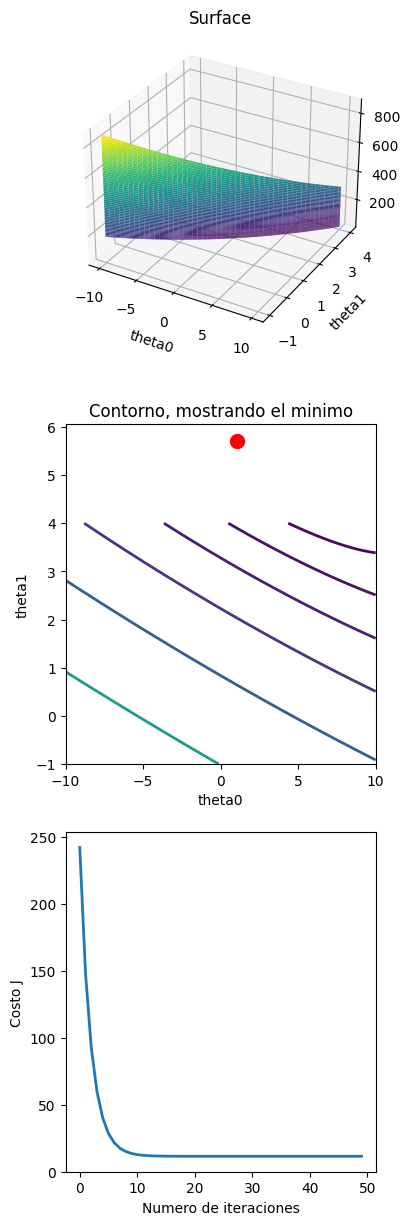

In [ ]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass